In [37]:
#7/6/24 For the implementation of K-fold testing with Random Forests onto the mutagen fingerprint data
#5 fold split, 4 train with the last fold being split into 2 for validation/testing
#After this is done will apply the process onto other models

#In total:
#The intial data is split into 80/20 for train/validation
#The training set is then split into 5 folds
#Each fold acts as a test/validation split for the other folds to predict on as training
#This results in 5 models
#The models then each predict onto the final validation set
#A consensus of each models prediction is taken and metrics from that are calculated

#Split tracking:
#From 100% total data: 80/20 initial split (train/validation)
#From 80% trainset: 16/16/16/16/16 Folds split 
    #For each fold: 64/8/8 train/test/valid splits for model training
    #The models are trained on the train set to be optimized for the test set and validated on the validation set
    #results in 5 models
#From 20% initial validation set
    #each model is tested
    #consensus (most popular result) is reached
#Net model is created

import pandas as pd
import numpy as np
import math
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
seed = 80
#Data import
#targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/structdata/Mutagen/mutagenMACCSfp.csv')
#targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/structdata/Mutagen/mutagenMorganfp.csv')
targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/structdata/Mutagen/mutagenTTorsionfp.csv')
#targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/structdata/Mutagen/mutagenAvafp.csv')
#targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/structdata/Mutagen/chemopy/mut_moe.csv')
smilesdropped = targetdata.drop(columns=['SMILES'])

#Splitting data into 5 folds 
dfarray = smilesdropped.to_numpy()
#First set aside 20% of the data for a final validation at the end
dfarray, tempset = train_test_split(dfarray, test_size=0.2, random_state=seed)

size = len(dfarray) / 5
splitsize = math.ceil(size)
empty = [[] for _ in range(5)]
splits = []
for list in empty:
    splits.append(list)

loops = 0
currsplit = 0
#Results in a list of 5 lists that each contain 1/5 of the targetdata
for row in dfarray:
    splits[currsplit].append(row)
    if loops == splitsize:
        loops = 0
        currsplit = currsplit + 1
    loops = loops + 1

folds = []
for split in splits:
    temp = pd.DataFrame(split)
    folds.append(temp)

In [38]:
targetdata

,SMILES,Toxicity_Values,0,1,2,3,4,5,6,7,...,502,503,504,505,506,507,508,509,510,511
0,OC[C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,OCC(O)CO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=[N+]([O-])OCC(CO[N+](=O)[O-])O[N+](=O)[O-],1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FC(F)(F)C(Cl)Br,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FC(F)OC(Cl)C(F)(F)F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6940,CC(=O)OC(c1ccc2c(c1)OCO2)C1CO1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6941,C=CC(OC(C)=O)c1ccc(OC)c2ccccc12,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6942,CCCC[NH+]([O-])O,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6943,C[NH+]([O-])O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
for item in targetdata['SMILES']:
    print(item)

OC[C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO
OCC(O)CO
O=[N+]([O-])OCC(CO[N+](=O)[O-])O[N+](=O)[O-]
FC(F)(F)C(Cl)Br
FC(F)OC(Cl)C(F)(F)F
FC(F)=C(F)F
FC(F)OC(F)(F)C(F)Cl
C/C=C(C(=C/C)/c1ccc(O)cc1)\c1ccc(O)cc1
O=[N+]([O-])O[C@H]1CO[C@H]2[C@@H]1OC[C@H]2O[N+](=O)[O-]
Oc1c(Cl)cc(Cl)c(Cl)c1Cc1c(O)c(Cl)cc(Cl)c1Cl
O=c1[nH]c(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1C(F)(F)F
NS(=O)(=O)c1cc2c(cc1Cl)NCNS2(=O)=O
O=C(Nc1ccc([N+](=O)[O-])cc1Cl)c1cc(Cl)ccc1O
O=C1c2c(O)ccc(O)c2C(=O)c2c(NCCNCCO)ccc(NCCNCCO)c21
Nc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1
Oc1ccc(O)cc1
NC(=O)c1cccnc1
O=C1CCC(N2C(=O)c3ccccc3C2=O)C(=O)N1
O=C1CN(/N=C/c2ccc([N+](=O)[O-])o2)C(=O)N1
O=C1OCCN1/N=C/c1ccc([N+](=O)[O-])o1
NC(=O)N/N=C/c1ccc([N+](=O)[O-])o1
Oc1c(Cl)cc(Cl)c2cccnc12
Oc1c(I)cc(Cl)c2cccnc12
Oc1cccc2cccnc12
Clc1ccc(C(c2ccccc2Cl)C(Cl)Cl)cc1
Nc1nc(N)c2nc(-c3ccccc3)c(N)nc2n1
O=C1Nc2ccc(Cl)cc2C(c2ccccc2)=NC1O
O=NN(CCCl)C(=O)NC1CCCCC1
O=C1OC2(c3ccc(O)cc3Oc3cc(O)ccc32)c2ccccc21
O=C(C1CCCCC1)N1CC(=O)N2CCc3ccccc3C2C1
NNc1nncc2ccccc12
O=C(CCBr)N1CCN(C(=O)CC

In [20]:
targetdata

,SMILES,Toxicity_Values,0,1,2,3,4,5,6,7,...,502,503,504,505,506,507,508,509,510,511
0,OC[C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,OCC(O)CO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=[N+]([O-])OCC(CO[N+](=O)[O-])O[N+](=O)[O-],1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FC(F)(F)C(Cl)Br,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FC(F)OC(Cl)C(F)(F)F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6940,CC(=O)OC(c1ccc2c(c1)OCO2)C1CO1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6941,C=CC(OC(C)=O)c1ccc(OC)c2ccccc12,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6942,CCCC[NH+]([O-])O,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6943,C[NH+]([O-])O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
len(tempset)

1389

In [22]:
#function to calculate various metrics, outputs a list of various metrics with a consistent index
def metriccalc(preds, ytrain):
    correctcount = 0
    fpcount = 0
    tpcount = 0
    tncount = 0
    fncount = 0
    testpos = 0
    testneg = 0
    
    #loop through each item in the predictions, logging positives, negatives and tn/tp/fn/tp
    iterations = 0
    for value in preds:
        testscore = ytrain[iterations]
        if value == 1:
            if testscore != 0:
                testpos = testpos + 1
                correctcount = correctcount + 1
                tpcount = tpcount + 1
            else:
                fpcount = fpcount + 1
                testneg = testneg + 1
        else:
            if testscore != 0:
                testpos = testpos + 1
                fncount = fncount + 1
            else:
                testneg = testneg + 1
                correctcount = correctcount + 1
                tncount = tncount + 1

        iterations = iterations + 1
    
    #calculate a wide swathe of metrics
    netfn = fncount / (fncount + tncount)
    nettn = tncount / (fncount + tncount)
    netacc = correctcount / (fpcount + fncount + tpcount + tncount)
    posacc = tpcount / testpos
    negacc = tncount / testneg
    netfp = fpcount / (fpcount + tpcount)
    nettp = tpcount / (tpcount + fpcount)

    fpr = fpcount / (fpcount + tncount)
    tpr = tpcount / (tpcount + fncount)



    f1 = (2 * tpcount) / ((2 * tpcount) + fpcount + fncount)


    tp = tpcount
    fp = fpcount
    tn = tncount
    fn = fncount

    
    temp = math.sqrt((fp + tn) * (tp + fp) * (tp + fn) * (tn + fn))
    if temp == 0:
        return 0
    mcc = ((tp * tn) - (fp * fn)) / temp



    temp = (( ( (tp + fp) * (fp + tn) ) + ( (tp + fn) * (fn + tn) ) ))
    if temp == 0:
        return 0
    kapp =  ( 2 * ((tp * tn) - (fn * fp)) ) / temp
    
    metriclist = [testpos, testneg, fn, tn, tp, fp, netacc, posacc, negacc, fpr, tpr, f1, mcc, kapp]
    
    return metriclist

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 1 best mcc of 0.5340821760104529 with an mtry of 17


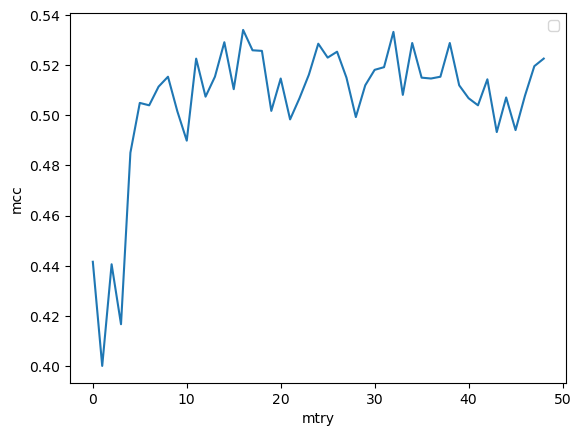

for model 1 validation metrics of:
positives in data 316
negatives in data 241 

fn count = 69
tn count = 181
tp count = 247
fp count = 60 

net accuracy = 0.7684021543985637
positive accuracy = 0.7816455696202531
negative accuracy = 0.7510373443983402 

fpr = 0.24896265560165975
tpr = 0.7816455696202531 

f1 score = 0.7929373996789727
mcc = 0.5306175834285438
cohen Kappa = 0.530332642642839


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 2 best mcc of 0.5555660696419862 with an mtry of 41


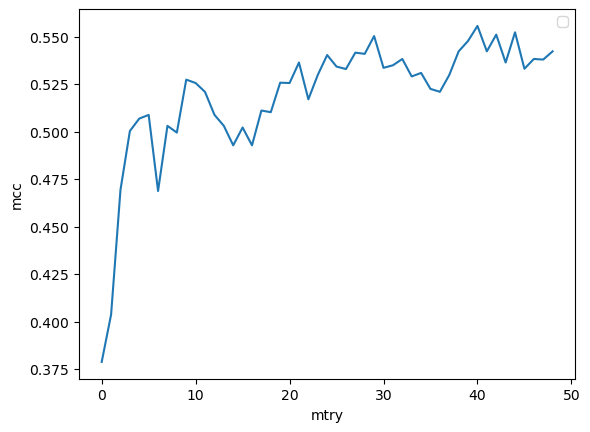

for model 2 validation metrics of:
positives in data 302
negatives in data 254 

fn count = 46
tn count = 179
tp count = 256
fp count = 75 

net accuracy = 0.7823741007194245
positive accuracy = 0.847682119205298
negative accuracy = 0.7047244094488189 

fpr = 0.2952755905511811
tpr = 0.847682119205298 

f1 score = 0.8088467614533965
mcc = 0.560626828069845
cohen Kappa = 0.5574646108509183


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 3 best mcc of 0.6117109274203415 with an mtry of 36


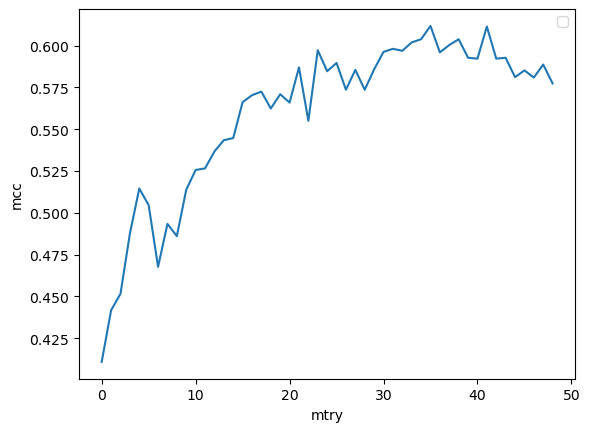

for model 3 validation metrics of:
positives in data 301
negatives in data 255 

fn count = 61
tn count = 200
tp count = 240
fp count = 55 

net accuracy = 0.7913669064748201
positive accuracy = 0.7973421926910299
negative accuracy = 0.7843137254901961 

fpr = 0.21568627450980393
tpr = 0.7973421926910299 

f1 score = 0.8053691275167785
mcc = 0.5807486750192411
cohen Kappa = 0.5806120192995461


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 4 best mcc of 0.5588951633722247 with an mtry of 47


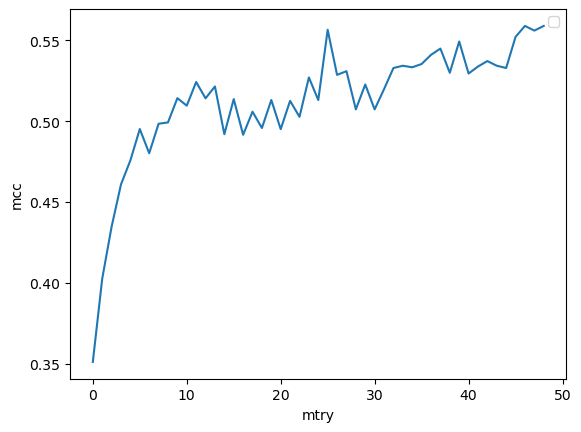

for model 4 validation metrics of:
positives in data 308
negatives in data 248 

fn count = 62
tn count = 191
tp count = 246
fp count = 57 

net accuracy = 0.7859712230215827
positive accuracy = 0.7987012987012987
negative accuracy = 0.7701612903225806 

fpr = 0.22983870967741934
tpr = 0.7987012987012987 

f1 score = 0.8052373158756138
mcc = 0.5678413275830057
cohen Kappa = 0.567747667703243


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


for fold 5 best mcc of 0.5934964993443327 with an mtry of 44


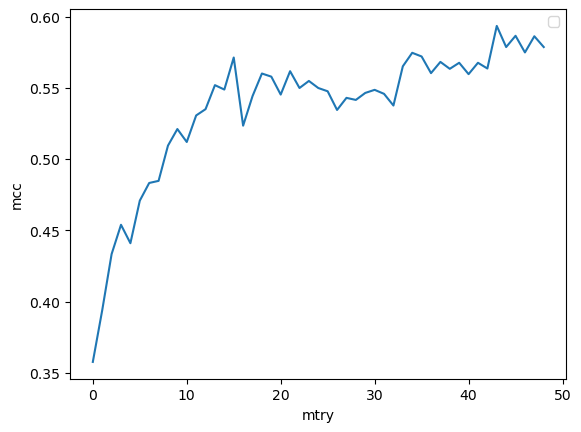

for model 5 validation metrics of:
positives in data 280
negatives in data 274 

fn count = 56
tn count = 207
tp count = 224
fp count = 67 

net accuracy = 0.7779783393501805
positive accuracy = 0.8
negative accuracy = 0.7554744525547445 

fpr = 0.24452554744525548
tpr = 0.8 

f1 score = 0.7845884413309983
mcc = 0.5561526590082505
cohen Kappa = 0.5557134846844968


In [23]:
model_list = []
validlist = []
#For loop that uses each fold once for valid/testing and the rest for training
#Each 'split' in the range corresponds to the set used for test/validation with the other 4 for training
iteration = 1
for split in range(0,5):
    #Set creation
    trainlist = [df for i, df in enumerate(folds) if i != split]
    trainset = pd.concat(trainlist, axis=0)
    testset, validset = train_test_split(folds[split], test_size=0.5, random_state=seed)
    
    ytrain = trainset[0].values
    xtrain = trainset.iloc[:, 1:]
    
    ytest = testset[0].values
    xtest = testset.iloc[:, 1:]
    
    yvalid = validset[0].values
    xvalid = validset.iloc[:, 1:]
    
    #lists of metric values
    mcclist = []
    maxval = 0
    for mtry in range(1, 50):
        #using mtry as the adjusted hyperparameter creates a series of random forests
        rf = RandomForestClassifier(n_estimators=mtry, criterion='entropy', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                bootstrap=True, oob_score=False, n_jobs= 4, random_state=seed, 
                                verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

        model= rf.fit(xtrain, ytrain)
        preds = model.predict(xtest)
        #calculate metric (mcc)
        mcc = metriccalc(preds, ytest)[12]
        mcclist.append(mcc)
        if mcc > maxval:
            maxval = mcc
            bestmetrics = mtry
    #store best model for the given fold and plot the metric vs mcc value
    rf = RandomForestClassifier(n_estimators=bestmetrics, criterion='entropy', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                bootstrap=True, oob_score=False, n_jobs= 4, random_state=seed, 
                                verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
    model_list.append(rf)
    print('for fold', split + 1, 'best mcc of', maxval, 'with an mtry of', bestmetrics)
    plt.plot(mcclist)

    plt.xlabel('mtry')
    plt.ylabel('mcc')
    plt.legend()
    plt.show()
    
    #check models onto validation set, printing various metrics
    model= rf.fit(xtrain, ytrain)
    preds = model.predict(xvalid)
    results = metriccalc(preds, yvalid)
    validlist.append(results)
    print('for model', iteration, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13])
    iteration = iteration + 1

In [24]:
y = tempset[:, 0]
x = tempset[:, 1:]
iter = 1
for model in model_list:
    predictions = []
    preds = model.predict(x)
    predictions.append(preds)
    
    results = metriccalc(preds, y)
    print('model', iter, 'validation metrics of:')
    print('positives in data', results[0])
    print('negatives in data', results[1], '\n')
    print('fn count =', results[2])
    print('tn count =', results[3])
    print('tp count =', results[4])
    print('fp count =', results[5], '\n')
    print('net accuracy =', results[6])
    print('positive accuracy =', results[7])
    print('negative accuracy =', results[8], '\n')
    print('fpr =', results[9])
    print('tpr =', results[10], '\n')
    print('f1 score =',results[11])
    print('mcc =',results[12])
    print('cohen Kappa =',results[13], '\n')
    iter = iter + 1

model 1 validation metrics of:
positives in data 756
negatives in data 633 

fn count = 144
tn count = 468
tp count = 612
fp count = 165 

net accuracy = 0.7775377969762419
positive accuracy = 0.8095238095238095
negative accuracy = 0.7393364928909952 

fpr = 0.26066350710900477
tpr = 0.8095238095238095 

f1 score = 0.7984344422700587
mcc = 0.5506027204563863
cohen Kappa = 0.5503455688921994 

model 2 validation metrics of:
positives in data 756
negatives in data 633 

fn count = 141
tn count = 463
tp count = 615
fp count = 170 

net accuracy = 0.7760979121670266
positive accuracy = 0.8134920634920635
negative accuracy = 0.731437598736177 

fpr = 0.2685624012638231
tpr = 0.8134920634920635 

f1 score = 0.7981829980532122
mcc = 0.5474568618833534
cohen Kappa = 0.5469681572348613 

model 3 validation metrics of:
positives in data 756
negatives in data 633 

fn count = 134
tn count = 465
tp count = 622
fp count = 168 

net accuracy = 0.7825773938084953
positive accuracy = 0.822751322751322

In [25]:
#get x and y values for the final validation set


toxvals = []
fingerprints = []
for row in tempset:
    toxvals.append(row[0])
    fingerprints.append(row[1:])


In [26]:
#calculates consensus of models on each fingerprint in the final validation set
consensuslist = []
predictions = []
for fp in fingerprints:
    consensus = -1
    fp = fp.reshape(1, -1)
    #appends each model's prediction to a list
    predictions = []
    predlist = []
    for model in model_list:
        preds = model.predict(fp)
        predictions.append(preds)
        predlist.append(preds)
    predictions.append(predlist)
    
    #finds number of 0s in the prediction list
    zercount = 0
    for num in predictions:
        if num == 0:
            zercount = zercount + 1
    #as there are 5 models, if there are less than 3 0s predicted, the consensus is 1
    if zercount < 3 :
        consensus = 1
    else:
        consensus = 0
    consensuslist.append(consensus)
#calculate and print metrics
results = metriccalc(consensuslist, toxvals)
print('validation metrics of:')
print('positives in data', results[0])
print('negatives in data', results[1], '\n')
print('fn count =', results[2])
print('tn count =', results[3])
print('tp count =', results[4])
print('fp count =', results[5], '\n')
print('net accuracy =', results[6])
print('positive accuracy =', results[7])
print('negative accuracy =', results[8], '\n')
print('fpr =', results[9])
print('tpr =', results[10], '\n')
print('f1 score =',results[11])
print('mcc =',results[12])
print('cohen Kappa =',results[13])

validation metrics of:
positives in data 756
negatives in data 633 

fn count = 130
tn count = 480
tp count = 626
fp count = 153 

net accuracy = 0.7962562994960403
positive accuracy = 0.828042328042328
negative accuracy = 0.7582938388625592 

fpr = 0.24170616113744076
tpr = 0.828042328042328 

f1 score = 0.8156351791530945
mcc = 0.5884042351246541
cohen Kappa = 0.5880744068483977


In [10]:
#oddly enough the consensus list produces almost the exact opposite of the correct predictions

In [11]:
#however, if we where to invert the consensus
loops = 0
for num in consensuslist:
    if num == 0:
        consensuslist[loops] = 1
    else:
        consensuslist[loops] = 0
    loops = loops + 1

In [12]:
results = metriccalc(consensuslist, toxvals)
print('validation metrics of:')
print('positives in data', results[0])
print('negatives in data', results[1], '\n')
print('fn count =', results[2])
print('tn count =', results[3])
print('tp count =', results[4])
print('fp count =', results[5], '\n')
print('net accuracy =', results[6])
print('positive accuracy =', results[7])
print('negative accuracy =', results[8], '\n')
print('fpr =', results[9])
print('tpr =', results[10], '\n')
print('f1 score =',results[11])
print('mcc =',results[12])
print('cohen Kappa =',results[13])

validation metrics of:
positives in data 756
negatives in data 633 

fn count = 638
tn count = 110
tp count = 118
fp count = 523 

net accuracy = 0.16414686825053995
positive accuracy = 0.15608465608465608
negative accuracy = 0.17377567140600317 

fpr = 0.8262243285939969
tpr = 0.15608465608465608 

f1 score = 0.16893342877594847
mcc = -0.6694964340341126
cohen Kappa = -0.6603798645238411


In [13]:
#we get a very accurate and robust set of results

In [14]:
#calculates consensus of models on each fingerprint in the final validation set
consensuslist = []
temp = [[], [], [], [], []]
predlist = []

for fp in fingerprints:
    consensus = -1
    fp = fp.reshape(1, -1)
    #appends each model's prediction to a list
    predictions = []
    cursum = 0
    for model in model_list:
        preds = model.predict(fp)
        predictions.append(preds)
        cursum = cursum + preds
        iter = iter + 1
    predlist.append(cursum)
    
    #finds number of 0s in the prediction list
    zercount = 0
    for num in predictions:
        if num == 0:
            zercount = zercount + 1
    #as there are 5 models, if there are more than 2 0s predicted, the consensus is 1
    if zercount > 2:
        consensus = 1
    else:
        consensus = 0
    consensuslist.append(consensus)
#calculate and print metrics
results = metriccalc(consensuslist, toxvals)
print('validation metrics of:')
print('positives in data', results[0])
print('negatives in data', results[1], '\n')
print('fn count =', results[2])
print('tn count =', results[3])
print('tp count =', results[4])
print('fp count =', results[5], '\n')
print('net accuracy =', results[6])
print('positive accuracy =', results[7])
print('negative accuracy =', results[8], '\n')
print('fpr =', results[9])
print('tpr =', results[10], '\n')
print('f1 score =',results[11])
print('mcc =',results[12])
print('cohen Kappa =',results[13])

validation metrics of:
positives in data 756
negatives in data 633 

fn count = 638
tn count = 110
tp count = 118
fp count = 523 

net accuracy = 0.16414686825053995
positive accuracy = 0.15608465608465608
negative accuracy = 0.17377567140600317 

fpr = 0.8262243285939969
tpr = 0.15608465608465608 

f1 score = 0.16893342877594847
mcc = -0.6694964340341126
cohen Kappa = -0.6603798645238411


In [15]:
bing = np.array(predlist)[:]

In [16]:
for item in bing:
    print(item)

[5]
[1]
[5]
[0]
[5]
[5]
[5]
[4]
[1]
[5]
[5]
[5]
[5]
[5]
[2]
[0]
[2]
[5]
[0]
[3]
[1]
[0]
[5]
[0]
[0]
[3]
[5]
[0]
[1]
[5]
[0]
[0]
[0]
[0]
[0]
[5]
[5]
[5]
[0]
[0]
[5]
[5]
[1]
[0]
[1]
[3]
[4]
[0]
[5]
[5]
[1]
[0]
[2]
[1]
[5]
[5]
[5]
[5]
[0]
[1]
[0]
[5]
[0]
[0]
[0]
[0]
[5]
[0]
[5]
[0]
[1]
[1]
[2]
[5]
[0]
[1]
[1]
[4]
[1]
[1]
[0]
[5]
[0]
[0]
[1]
[2]
[5]
[5]
[5]
[2]
[5]
[5]
[5]
[5]
[0]
[1]
[5]
[5]
[5]
[5]
[5]
[5]
[0]
[5]
[0]
[1]
[5]
[5]
[0]
[5]
[5]
[5]
[5]
[0]
[4]
[5]
[5]
[5]
[5]
[0]
[5]
[2]
[5]
[0]
[5]
[4]
[5]
[0]
[5]
[0]
[1]
[0]
[5]
[0]
[5]
[5]
[1]
[0]
[5]
[1]
[0]
[1]
[2]
[0]
[5]
[0]
[5]
[3]
[0]
[0]
[0]
[0]
[4]
[5]
[3]
[0]
[2]
[5]
[5]
[2]
[5]
[0]
[5]
[0]
[5]
[0]
[5]
[5]
[3]
[2]
[0]
[5]
[1]
[0]
[3]
[1]
[5]
[5]
[0]
[5]
[0]
[0]
[1]
[0]
[0]
[5]
[5]
[5]
[5]
[0]
[0]
[1]
[0]
[0]
[5]
[0]
[5]
[5]
[0]
[0]
[5]
[0]
[5]
[4]
[1]
[4]
[5]
[0]
[2]
[5]
[5]
[0]
[5]
[3]
[5]
[5]
[5]
[0]
[5]
[0]
[0]
[0]
[5]
[5]
[5]
[5]
[5]
[0]
[5]
[0]
[0]
[0]
[0]
[0]
[5]
[0]
[4]
[0]
[0]
[5]
[5]
[3]
[5]
[5]
[5]
[4]
[0]
[0]
[0]
[1]


In [17]:
array = np.array(temp)[:,:,0]

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:

total = []
for item in array[0]:
    templist = []
    loops = 0
    for list in array:
        
        for val in list[loops]:
            
    

In [ ]:
len(predictions[0])

In [ ]:

sns.heatmap(bing, annot=False, cmap="viridis", cbar=True)
plt.title("Heatmap of Binary Variables")
plt.xlabel("Variable Index")
plt.ylabel("List Index")
plt.show()